In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.mixture import GaussianMixture
from sklearn import mixture

In [3]:
# Data snapshot from 3/11/2022
# https://donnees.montreal.ca/ville-de-montreal/actes-criminels
data = pd.read_csv("data/montreal_crime_data.csv", encoding='latin1')

In [4]:
data.head()

,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE
0,Vol de véhicule à moteur,2018-09-13,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
1,Vol de véhicule à moteur,2018-04-30,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
2,Vol de véhicule à moteur,2018-09-01,nuit,7.0,290274.565000,5.042150e+06,-73.685928,45.519122
3,Méfait,2017-07-21,jour,21.0,0.000000,0.000000e+00,-76.237290,0.000000
4,Méfait,2017-07-29,jour,12.0,0.000000,0.000000e+00,-76.237290,0.000000


## Preprocessing & exploring

In [5]:
data.columns

Index(['CATEGORIE', 'DATE', 'QUART', 'PDQ', 'X', 'Y', 'LONGITUDE', 'LATITUDE'], dtype='object')

#### Meta information of data

In [6]:
print(f"Shape of data is: {data.shape}")

Shape of data is: (214322, 8)


In [7]:
pd.DataFrame(data.dtypes, columns=['Datatype']).rename_axis('Columns')

,Datatype
Columns,
CATEGORIE,object
DATE,object
QUART,object
PDQ,float64
X,float64
Y,float64
LONGITUDE,float64
LATITUDE,float64


## Data cleaning

#### Converting date feature to datatime format

In [8]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [9]:
data['DATE'].head()

0   2018-09-13
1   2018-04-30
2   2018-09-01
3   2017-07-21
4   2017-07-29
Name: DATE, dtype: datetime64[ns]

In [10]:
datatypes = pd.DataFrame(data.dtypes, columns=['Datatype']).rename_axis('Columns')
datatypes

,Datatype
Columns,
CATEGORIE,object
DATE,datetime64[ns]
QUART,object
PDQ,float64
X,float64
Y,float64
LONGITUDE,float64
LATITUDE,float64


#### Checking for NaN values

In [11]:
pd.DataFrame(data.isnull().sum(), columns=['Nb of missing values']).rename_axis('Feature')

,Nb of missing values
Feature,
CATEGORIE,0
DATE,0
QUART,0
PDQ,5
X,0
Y,0
LONGITUDE,0
LATITUDE,0


## Modélization

In [30]:
#for category in np.unique(data.CATEGORIE):
#    indexes = data.CATEGORIE == category
#    category_data = data[indexes]
#    for quart in np.unique(category_data.QUART):
#        indexess = category_data.QUART == quart
#        category_quart_data = category_data[indexess]
#        print(category_quart_data)
for category in np.unique(data.CATEGORIE):
    for quart in np.unique(category_data.QUART):
        cat = (data.CATEGORIE == category)
        qrt = (data.QUART == quart)
        split_data = data[cat*qrt]
        print(split_data)

                             CATEGORIE       DATE QUART   PDQ              X  \
829     Infractions entrainant la mort 2016-08-16  jour  10.0  288531.426000   
17577   Infractions entrainant la mort 2015-05-30  jour  26.0  294802.625011   
22999   Infractions entrainant la mort 2017-10-23  jour  22.0  299946.603991   
23517   Infractions entrainant la mort 2016-06-06  jour  13.0  295100.006000   
29208   Infractions entrainant la mort 2017-11-19  jour  44.0  300044.701001   
45059   Infractions entrainant la mort 2015-08-22  jour  30.0       0.000000   
45597   Infractions entrainant la mort 2017-03-18  jour  46.0  298296.718000   
46415   Infractions entrainant la mort 2016-08-18  jour  10.0       0.000000   
53682   Infractions entrainant la mort 2017-02-20  jour  22.0  301063.162003   
72317   Infractions entrainant la mort 2015-05-22  jour  35.0  295832.306992   
77436   Infractions entrainant la mort 2015-10-29  jour  39.0  295479.487998   
84957   Infractions entrainant la mort 2

                               CATEGORIE       DATE QUART   PDQ  \
8       Vol dans / sur véhicule à moteur 2017-08-01  jour  39.0   
33      Vol dans / sur véhicule à moteur 2018-09-05  jour  38.0   
34      Vol dans / sur véhicule à moteur 2017-08-25  jour  22.0   
39      Vol dans / sur véhicule à moteur 2018-10-28  jour  21.0   
44      Vol dans / sur véhicule à moteur 2017-09-12  jour  31.0   
...                                  ...        ...   ...   ...   
214291  Vol dans / sur véhicule à moteur 2022-03-04  jour  38.0   
214293  Vol dans / sur véhicule à moteur 2022-03-09  jour  39.0   
214295  Vol dans / sur véhicule à moteur 2022-03-09  jour  42.0   
214313  Vol dans / sur véhicule à moteur 2022-03-04  jour   5.0   
214321  Vol dans / sur véhicule à moteur 2022-03-07  jour   9.0   

                    X             Y  LONGITUDE   LATITUDE  
8       294259.780993  5.051450e+06 -73.635117  45.602873  
33      297929.906992  5.042566e+06 -73.587945  45.522974  
34      300675.

             CATEGORIE       DATE QUART   PDQ              X             Y  \
17      Vols qualifiés 2017-08-02  soir  21.0  300149.764000  5.041903e+06   
77      Vols qualifiés 2018-09-14  soir  27.0  294163.348000  5.045419e+06   
111     Vols qualifiés 2017-09-16  soir  46.0  301799.197000  5.051375e+06   
132     Vols qualifiés 2016-05-13  soir  12.0       0.000000  0.000000e+00   
160     Vols qualifiés 2015-12-14  soir  27.0  292373.912996  5.045343e+06   
...                ...        ...   ...   ...            ...           ...   
214161  Vols qualifiés 2022-03-06  soir  26.0  294856.464990  5.039187e+06   
214176  Vols qualifiés 2022-03-05  soir   8.0  290698.094008  5.034022e+06   
214246  Vols qualifiés 2022-03-08  soir  44.0  298232.926008  5.047018e+06   
214296  Vols qualifiés 2022-03-09  soir  15.0  297637.180003  5.037373e+06   
214304  Vols qualifiés 2022-03-09  soir  50.0  299481.209154  5.040914e+06   

        LONGITUDE   LATITUDE  
17     -73.559522  45.517031  
7

In [47]:
classifier = GaussianMixture(n_components=100, covariance_type="full")

In [48]:
coords = np.vstack((data.X, data.Y)).T

In [49]:
filtereddata = np.array(list(filter(lambda d: ((d[0] > 1000 and d[1] > 1000) and (d[0] < 1e6)), coords)))
filtereddata[:,0]

array([294904.15900121, 294904.15900121, 290274.565     , ...,
       299344.83600734, 294968.04999209, 291553.78100532])

<function matplotlib.pyplot.show(close=None, block=None)>

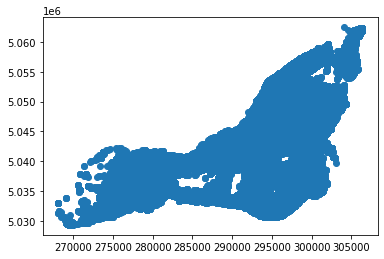

In [50]:
plt.scatter(filtereddata[:,0],y=filtereddata[:,1])
plt.show

In [51]:
classifier.fit(filtereddata)

GaussianMixture(n_components=100)

In [52]:
testdata = np.array([[ 294904, 5047548],
       [ 294904, 5047548],
       [ 290274, 5042150],
       [ 299344, 5040364],
       [ 294968, 5047651],
       [ 291553, 5035569]])

[[ 300424.68117532 5042652.50757901]
 [ 287325.02643011 5035301.03924922]
 [ 296628.86819725 5050407.46245575]
 [ 295129.61531418 5032888.11699866]
 [ 303106.55248594 5052000.16683301]
 [ 275821.21803553 5037364.99110731]
 [ 293967.46403845 5044905.36909577]
 [ 296567.10793832 5037294.66767886]
 [ 287769.87326443 5043152.67424298]
 [ 297703.50707823 5044905.77815976]
 [ 298544.55235135 5039270.65203245]
 [ 301661.37964327 5048560.54851212]
 [ 300246.8327077  5057660.12660425]
 [ 272718.472455   5031313.86265183]
 [ 304969.2636895  5054922.08552919]
 [ 290548.47135316 5033493.72088793]
 [ 295497.68441806 5052965.99775171]
 [ 298208.05846804 5037495.08406517]
 [ 282674.16570441 5040183.83143003]
 [ 279783.09380778 5034189.318596  ]
 [ 289048.65050369 5039590.69018353]
 [ 301928.7487693  5045638.09698508]
 [ 295148.41593057 5047737.15604767]
 [ 299763.91885786 5049017.92121665]
 [ 294833.76293831 5040764.79120466]
 [ 297630.49699085 5042557.9276462 ]
 [ 304211.81146436 5058119.58865573]
 

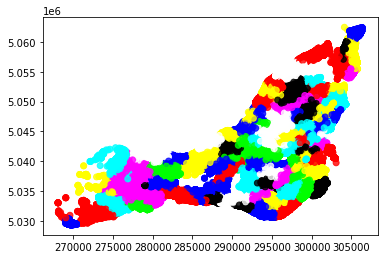

In [53]:
print(classifier.means_)

colors = []
for i in range(100):
    colors.append(tuple(np.random.choice(range(0, 2), size=3)))
    
dcolors = [colors[i] for i in classifier.predict(filtereddata)]

ax = plt.gca()
ax.scatter(filtereddata[:,0], filtereddata[:,1], c=dcolors, alpha=0.8)
plt.show()

In [37]:
def fit_samples(samples):
    gmix = GaussianMixture(n_components=100, covariance_type='spherical')
    gmix.fit(samples)
    print(gmix.means_)
    cmap = plt.get_cmap('gnuplot')
    colors = [cmap(i) for i in gmix.predict(samples)]
    ax = plt.gca()
    ax.scatter(samples[:,0], samples[:,1], alpha=0.8)
    plt.show()

[[ 293921.03597123 5035240.71361141]
 [ 298401.07816008 5052023.62211517]
 [ 299298.45925569 5045350.08365158]
 [ 278392.43910645 5040374.28011334]
 [ 291823.66614316 5045296.31498375]
 [ 300155.391782   5040607.81096696]
 [ 296985.01481999 5050792.92900468]
 [ 304093.03972655 5056863.59939038]
 [ 301660.75520979 5048454.82229122]
 [ 278410.03045741 5037874.47808383]
 [ 285536.33750813 5039278.33376386]
 [ 291407.9247519  5041562.68550945]
 [ 298979.81559767 5041992.24614749]
 [ 301104.65109904 5035634.93183228]
 [ 294327.55099772 5045170.33577507]
 [ 293975.5431004  5049682.50726565]
 [ 289730.60588664 5033335.59866558]
 [ 273104.14921843 5031399.72407505]
 [ 301371.12271727 5045000.31381883]
 [ 281687.78488276 5038278.19533597]
 [ 297327.99318489 5034945.41798   ]
 [ 296759.53776813 5043893.17599153]
 [ 296865.76877612 5046968.57789977]
 [ 295194.86862614 5039713.4061696 ]
 [ 298337.40231659 5038787.04452491]
 [ 295170.69244445 5033077.56162095]
 [ 285524.6549023  5034329.20967948]
 

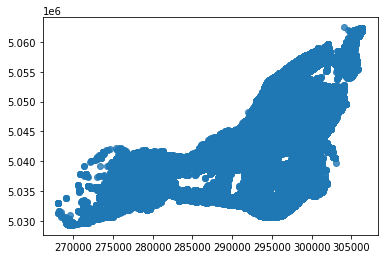

In [38]:
fit_samples(filtereddata)

## Visualization